In [11]:
import json

with open('results.json') as f:
    results = json.load(f)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [14]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. <pad>: 0.3996
	2. round: 0.3365
	3. blue: 0.3285
	4. four: 0.3252
	5. green: 0.1855
	6. canvas: 0.1498
	7. bottom: 0.1468
	8. angle: 0.1173
	9. this: 0.1159
	10. up: 0.0555
	11. left: 0.0244
	12. right: 0.0137
	13. color: 0.0081
	14. three: 0.0000
	15. red: 0.0000
	16. has: 0.0000
	17. rotate: 0.0000
	18. white: 0.0000
	19. shape: 0.0000
	20. position: 0.0000
	21. blank: 0.0000
	22. unrotate: 0.0000
	23. is: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


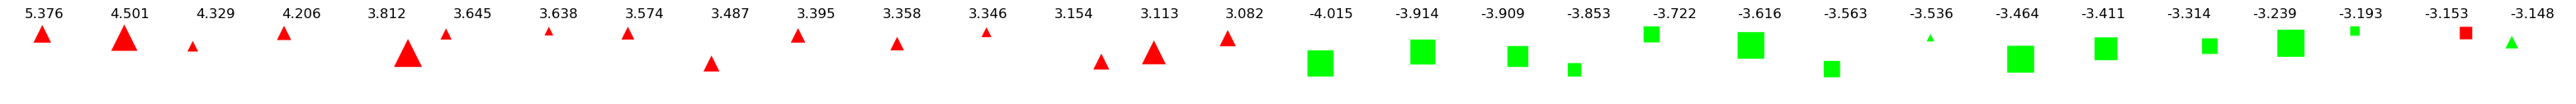

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. position: 0.6924
	2. <pad>: 0.2926
	3. green: 0.2175
	4. color: 0.1037
	5. round: 0.1004
	6. blank: 0.0007
	7. three: 0.0000
	8. has: 0.0000
	9. angle: 0.0000
	10. four: 0.0000
	11. blue: 0.0000
	12. red: 0.0000
	13. white: 0.0000
	14. left: 0.0000
	15. up: 0.0000
	16. rotate: 0.0000
	17. canvas: 0.0000
	18. shape: 0.0000
	19. this: 0.0000
	20. unrotate: 0.0000
	21. bottom: 0.0000
	22. right: 0.0000
	23. is: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


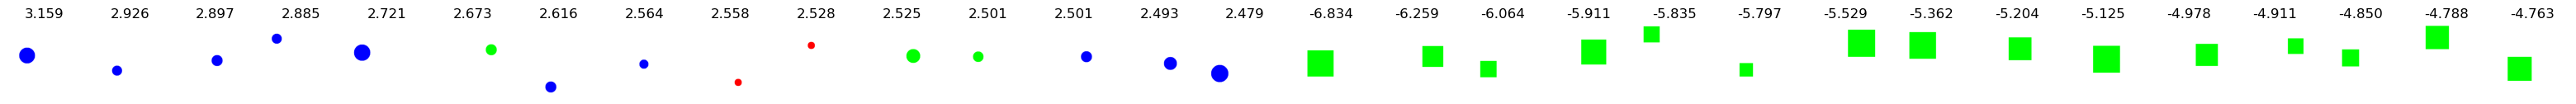

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. angle: 0.3918
	2. blue: 0.3099
	3. three: 0.2884
	4. green: 0.1877
	5. round: 0.1396
	6. red: 0.1090
	7. right: 0.1045
	8. white: 0.0894
	9. <pad>: 0.0790
	10. bottom: 0.0762
	11. shape: 0.0750
	12. left: 0.0681
	13. is: 0.0676
	14. blank: 0.0646
	15. four: 0.0386
	16. this: 0.0293
	17. has: 0.0260
	18. up: 0.0114
	19. position: 0.0018
	20. rotate: 0.0000
	21. canvas: 0.0000
	22. color: 0.0000
	23. unrotate: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


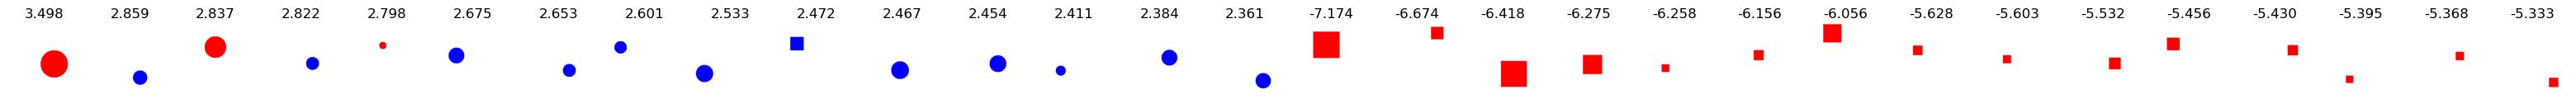

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. white: 0.1595
	2. blank: 0.1486
	3. is: 0.1303
	4. bottom: 0.1204
	5. rotate: 0.1178
	6. canvas: 0.1150
	7. shape: 0.1120
	8. this: 0.1096
	9. color: 0.1077
	10. left: 0.1014
	11. blue: 0.0754
	12. has: 0.0698
	13. round: 0.0697
	14. position: 0.0507
	15. three: 0.0484
	16. four: 0.0279
	17. <pad>: 0.0159
	18. up: 0.0100
	19. green: 0.0073
	20. unrotate: 0.0011
	21. red: 0.0000
	22. angle: 0.0000
	23. right: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


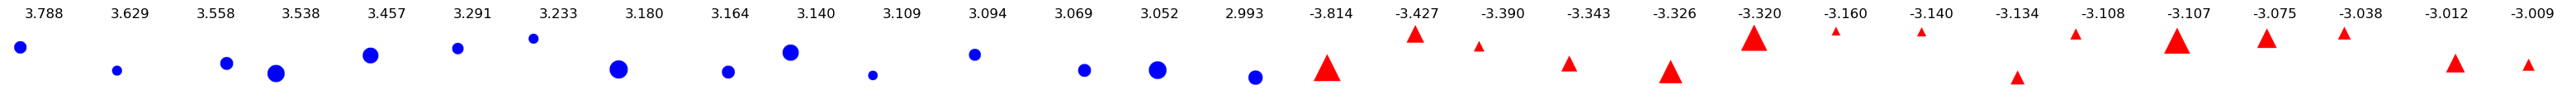

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. red: 0.3024
	2. has: 0.2525
	3. four: 0.2003
	4. this: 0.1921
	5. <pad>: 0.1862
	6. color: 0.1474
	7. bottom: 0.1098
	8. position: 0.0950
	9. right: 0.0773
	10. green: 0.0529
	11. up: 0.0395
	12. shape: 0.0252
	13. blank: 0.0150
	14. rotate: 0.0057
	15. left: 0.0022
	16. blue: 0.0000
	17. is: 0.0000
	18. round: 0.0000
	19. three: 0.0000
	20. white: 0.0000
	21. unrotate: 0.0000
	22. canvas: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


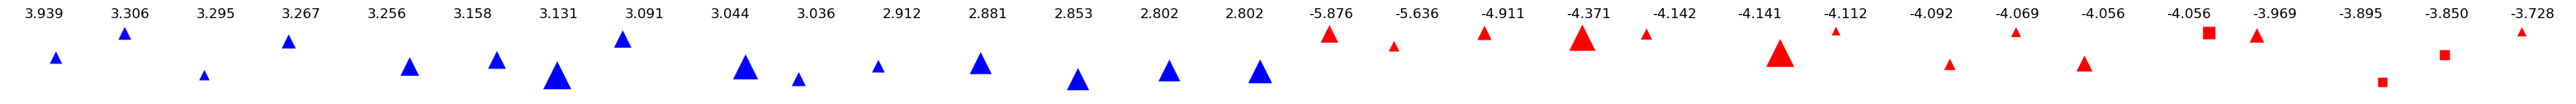

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. green: 0.2698
	2. red: 0.2690
	3. four: 0.2615
	4. round: 0.1888
	5. shape: 0.1648
	6. <pad>: 0.1582
	7. has: 0.1555
	8. canvas: 0.1417
	9. color: 0.1230
	10. this: 0.0835
	11. left: 0.0018
	12. blue: 0.0000
	13. three: 0.0000
	14. is: 0.0000
	15. bottom: 0.0000
	16. white: 0.0000
	17. unrotate: 0.0000
	18. position: 0.0000
	19. rotate: 0.0000
	20. right: 0.0000
	21. blank: 0.0000
	22. up: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


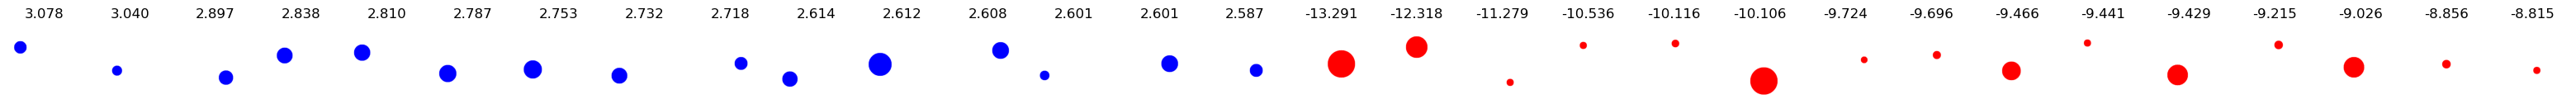

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. red: 0.2483
	2. three: 0.2025
	3. this: 0.1587
	4. canvas: 0.1451
	5. <pad>: 0.1441
	6. color: 0.1293
	7. shape: 0.1135
	8. has: 0.0912
	9. bottom: 0.0827
	10. position: 0.0749
	11. four: 0.0586
	12. right: 0.0452
	13. up: 0.0402
	14. rotate: 0.0107
	15. blank: 0.0082
	16. left: 0.0077
	17. angle: 0.0038
	18. is: 0.0000
	19. round: 0.0000
	20. green: 0.0000
	21. blue: 0.0000
	22. unrotate: 0.0000
	23. white: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


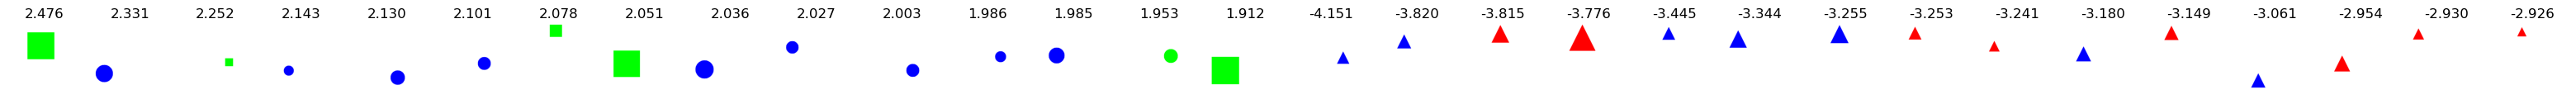

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. color: 0.3516
	2. <pad>: 0.2075
	3. four: 0.1880
	4. position: 0.1856
	5. canvas: 0.1809
	6. has: 0.1660
	7. red: 0.1043
	8. is: 0.0136
	9. left: 0.0001
	10. green: 0.0001
	11. rotate: 0.0000
	12. three: 0.0000
	13. blue: 0.0000
	14. round: 0.0000
	15. bottom: 0.0000
	16. white: 0.0000
	17. this: 0.0000
	18. shape: 0.0000
	19. unrotate: 0.0000
	20. right: 0.0000
	21. blank: 0.0000
	22. up: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


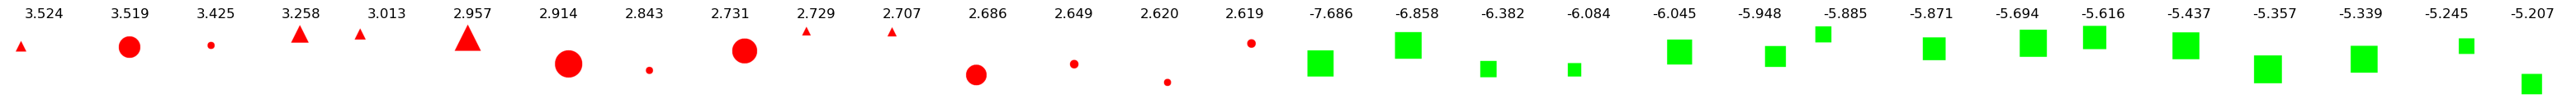

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. green: 0.3273
	2. position: 0.2733
	3. has: 0.2654
	4. four: 0.2393
	5. <pad>: 0.1679
	6. red: 0.1321
	7. angle: 0.1108
	8. shape: 0.0983
	9. round: 0.0828
	10. bottom: 0.0500
	11. this: 0.0218
	12. rotate: 0.0145
	13. up: 0.0097
	14. blank: 0.0022
	15. right: 0.0004
	16. is: 0.0000
	17. blue: 0.0000
	18. unrotate: 0.0000
	19. left: 0.0000
	20. color: 0.0000
	21. canvas: 0.0000
	22. white: 0.0000
	23. three: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


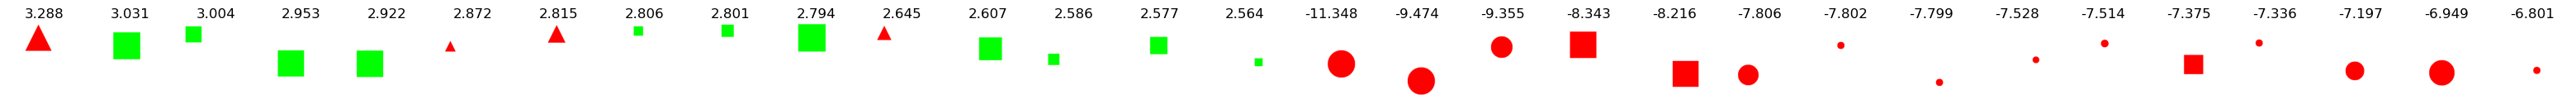

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. is: 0.2250
	2. green: 0.2192
	3. this: 0.1887
	4. four: 0.1857
	5. canvas: 0.1741
	6. round: 0.1729
	7. <pad>: 0.1198
	8. shape: 0.0935
	9. white: 0.0885
	10. left: 0.0754
	11. red: 0.0743
	12. blank: 0.0610
	13. bottom: 0.0610
	14. right: 0.0604
	15. rotate: 0.0453
	16. up: 0.0283
	17. three: 0.0000
	18. has: 0.0000
	19. angle: 0.0000
	20. blue: 0.0000
	21. unrotate: 0.0000
	22. color: 0.0000
	23. position: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


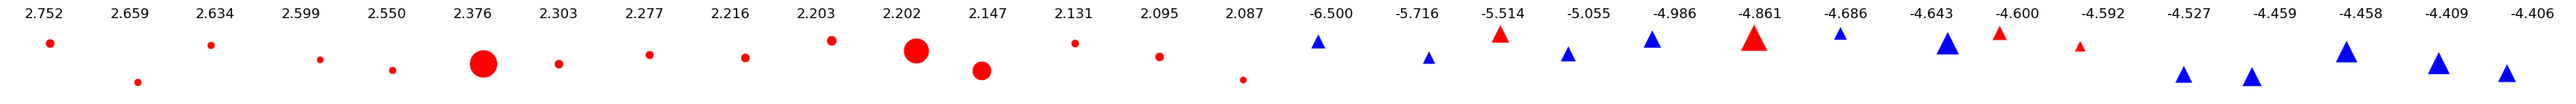

----------------------------------------------------------------------------------------------------


In [15]:
for i in range(10):
    visualize_concept(i)